In [289]:
%pip install pandas
%pip install openpyxl
%pip install scipy
import pandas as pd
import numpy as np

data_source = 'local'

prilohy_path = {
    'A': '../data/prilohaA-napocet.xlsx',
    'B': '../data/prilohaB-crepc.xlsx',
    'C': '../data/prilohaC-monografie.xlsx',
    'D': '../data/prilohaD-granty.xlsx',
    'publ': '../data/publikacna_cinnost.xlsx'
} if data_source == 'local' else {
    'A': 'https://www.minedu.sk/data/att/25844.xlsx',
    'B': 'https://www.minedu.sk/data/att/25563.xlsx',
    'C': 'https://www.minedu.sk/data/att/25537.xlsx',
    'D': 'https://www.minedu.sk/data/att/25538.xlsx',
    'publ': 'https://www.minedu.sk/data/att/24957.xlsx'
}

prilohaA = pd.read_excel(prilohy_path['A'], sheet_name = None, header=None)
print(prilohaA.keys())
# ['E1_alokácia', 'E2_zamestnanci_2021', 'E3_oblasti', 'E4a_M1_prirodne', 'E4b_M2_technicke', 'E4c_M3_lekarske', 'E4d_M4_polno_les_vet', 'E4e_M5_spolocenske', 'E4f_M6_humanitne', 'E4g_M6_umenie']
prilohaB = pd.read_excel(prilohy_path['B'], sheet_name = None)
print(prilohaB.keys())
# ['2021 - 3']
prilohaC = pd.read_excel(prilohy_path['C'], sheet_name = None)
print(prilohaC.keys())
# ['crepc 2020', 'crepc 2021', 'crepc 2022', 'crepc 2022-2', 'CVTI_NORDIC', 'Nordic_CVTI 2020', 'Nordic_CVTI 2021', 'vystupy 2020', 'vystupy 2021', 'Hárok1']
prilohaD = pd.read_excel(prilohy_path['D'], sheet_name = None)
print(prilohaD.keys())
# ['T3 - výsk. zahr. grant. schémy', 'old', 'oblasti výskumu', 'VŠ', 'Odbory VaT']
prilohaPUBL = pd.read_excel(prilohy_path['publ'], sheet_name = None, header=None)
print(prilohaPUBL.keys())
# ['vs_podiel', 'jednotkove', 'kalkuljednotkove', 'distribucia', 'data', 'sucasti', 'zoznamvs', 'kategoriaskupiny', 'vahymnozin', 'mnoziny', 'Patenty', 'rozpis07712', 'rozpis07711']


Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
Note: you may need to restart the kernel to use updated packages.
dict_keys(['E1_alokácia', 'E2_zamestnanci_2021', 'E3_oblasti', 'E4a_M1_prirodne', 'E4b_M2_technicke', 'E4c_M3_lekarske', 'E4d_M4_polno_les_vet', 'E4e_M5_spolocenske', 'E4f_M6_humanitne', 'E4g_M6_umenie'])
dict_keys(['2021 - 3'])
dict_keys(['crepc 2020', 'crepc 2021', 'crepc 2022', 'crepc 2022-2', 'CVTI_NORDIC', 'Nordic_CVTI 2020', 'Nordic_CVTI 2021', 'vystupy 2020', 'vystupy 2021', 'Hárok1'])
dict_keys(['T3 - výsk. zahr. grant. schémy', 'old', 'oblasti výskumu', 'VŠ', 'Odbory VaT'])


/home/viki/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/viki/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)
/home/viki/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Conditional Formatting extension is not supported and will be removed
  warn(msg)
/home/viki/.local/lib/python3.8/site-packages/openpyxl/worksheet/_reader.py:329: UserWarning: Data Validation extension is not supported and will be removed
  warn(msg)


dict_keys(['vs_podiel', 'jednotkove', 'kalkuljednotkove', 'distribucia', 'data', 'sucasti', 'zoznamvs', 'kategoriaskupiny', 'vahymnozin', 'mnoziny', 'Patenty', 'rozpis07712', 'rozpis07711'])


In [290]:
oblasti_mapping_sheet = prilohaA['E3_oblasti'].copy()

dictionary1 = oblasti_mapping_sheet.set_index(0)[2].to_dict()
dictionary2 = oblasti_mapping_sheet.set_index(1)[2].to_dict()
dictionary3 = {key: value for key, value in zip([
'PRÍRODNÉ VEDY',
'TECHNICKÉ VEDY', 
'LEKÁRSKE VEDY',
'PÔDOHOSPODÁRSKE VEDY',
'SPOLOČENSKÉ VEDY',
'HUMANITNÉ VEDY',
], [f'M{i}' for i in range(1,7)])}

oblasti_mapping = {**dictionary1, **dictionary2, **dictionary3}
oblasti_mapping

{91: 'M1',
 92: 'M1',
 120: 'M1',
 130: 'M1',
 240: 'M1',
 50: 'M2',
 100: 'M2',
 110: 'M2',
 140: 'M2',
 150: 'M2',
 160: 'M2',
 170: 'M2',
 180: 'M3',
 190: 'M4',
 200: 'M4',
 10: 'M5',
 60: 'M5',
 70: 'M5',
 80: 'M5',
 210: 'M5',
 220: 'M2',
 230: 'M5',
 20: 'M6',
 30: 'M6',
 40: 'M6',
 'fyzika': 'M1',
 'vedy o Zemi a vesmíre': 'M1',
 'chémia, chemická technológia a biotechnológie': 'M1',
 'vedy o živej prírode': 'M1',
 'matematika a štatistika': 'M1',
 'projektovanie, inžinierstvo, technológie a vodné hospodárstvo': 'M2',
 'environmentalistika a ekológia': 'M2',
 'metalurgické a montánne vedy': 'M2',
 'strojárstvo': 'M2',
 'elektrotechnika a elektroenergetika': 'M2',
 'informatické vedy, automatizácia a telekomunikácie': 'M2',
 'inžinierstvo a technológie': 'M2',
 'lekárske, farmaceutické a nelekárske zdravotnícke vedy': 'M3',
 'poľnohospodárske a lesnícke vedy': 'M4',
 'veterinárske vedy': 'M4',
 'pedagogické vedy': 'M5',
 'spoločenské a behaviorálne vedy': 'M5',
 'právo a medziná

In [291]:
vs_skratky = pd.read_csv('../data/vs_skratky.csv', index_col=0)
vs_skratky2cely_nazov = vs_skratky.reset_index().drop(columns=['cislo']).set_index('skratka_mesto')['VS_NAZOV'].to_dict()
vs_skratky2cely_nazov

{'UK Bratislava': 'Univerzita Komenského v Bratislave',
 'STU Bratislava': 'Slovenská technická univerzita v Bratislave',
 'EU Bratislava': 'Ekonomická univerzita v Bratislave',
 'SPU Nitra': 'Slovenská poľnohospodárska univerzita v Nitre',
 'TU Zvolen': 'Technická univerzita vo Zvolene',
 nan: 'Vysoká škola NEWTON, a.s. (NEWTON University)',
 'VŠMU Bratislava': 'Vysoká škola múzických umení v Bratislave',
 'UVLF Košice': 'Univerzita veterinárskeho lekárstva a farmácie v Košiciach',
 'TU Košice': 'Technická univerzita v Košiciach',
 'ŽU Žilina': 'Žilinská univerzita v Žiline',
 'UPJŠ Košice': 'Univerzita Pavla Jozefa Šafárika v Košiciach',
 'TVU Trnava': 'Trnavská univerzita v Trnave',
 'UMB Banská Bystrica': 'Univerzita Mateja Bela v Banskej Bystrici',
 'UKF Nitra': 'Univerzita Konštantína Filozofa v Nitre',
 'PU Prešov': 'Prešovská univerzita v Prešove',
 'TUAD Trenčín': 'Trenčianska univerzita Alexandra Dubčeka v Trenčíne',
 'UCM Trnava': 'Univerzita sv. Cyrila a Metoda v Trnave',
 

a) excelentná publikačná činnosť podľa bodu 4, celková váha 60%.

a) V oblastiach **M1**: prírodné vedy, **M2**: technické vedy, **M3**: lekárske vedy, **M4**: poľnohospodárske, lesnícke a veterinárske vedy sa zohľadňujú **váhou 100%** indexované publikácie (WoS, Scopus), teda kategórie **ADC, ADD, ADM, ADN**. Zoznam sa nachádza **v prílohe B**. Všetky výstupy sa **váhujú** podľa pracovísk tak, aby každý výstup bol zarátaný iba raz (súčet všetkých váh za daný **výstup je 1,00**).

b) V oblasti **M5**: spoločenské vedy sa zohľadňujú **váhou 75%** indexované publikácie **(WoS, Scopus)**, teda kategórie **ADC, ADD, ADM, ADN**. Tieto výstupy sa bonifikujú v súlade s metodikou rozpisu **(prvý kvartil JCR je zohľadnený váhou 6, druhý kvartil váhou 4, tretí kvartil váhou 1 a štvrtý kvartil váhou 0,5)**. Zoznam sa nachádza **v prílohe B**. **Váhou 25%** sa zohľadňujú monografie (**AAA, AAB**). Tieto výstupy sa **bonifikujú** tak, že vydavateľstvá zaradené v databáze Nordic List (https://kanalregister.hkdir.no/publiseringskanaler/Forside.action?request_locale=en) v kategórii 2 (prestížne vedecké vydavateľstvo) sú bonifikované váhou 6, vydavateľstvá zaradené v databáze Nordic List v kategórii 1 (vedecké vydavateľstvo) váhou 4, vydavateľstvá zaradené v databáze CVTI (zoznam zahraničných vydavateľstiev: http://cms.crepc.sk/Data/Sites/1/pdf/zoznam-vydavatelstva/zoznam-vydavatelstva-01-2020.pdf) sú zohľadnené váhou 1 a všetky ostatné monografie sú zohľadnené váhou 0,5). Zoznam aj so zaradením sa nachádza v prílohe C. Všetky výstupy sa váhujú podľa pracovísk tak, aby každý výstup bol zarátaný iba raz (súčet všetkých váh za daný výstup je 1,00).

c) V oblasti M6a: humanitné vedy sa zohľadňujú váhou 60% indexované publikácie (WoS, Scopus), teda kategórie ADC, ADD, ADM, ADN. Tieto výstupy sa bonifikujú v súlade s metodikou rozpisu (prvý kvartil JCR je zohľadnený váhou 6, druhý kvartil váhou 4, tretí kvartil váhou 1 a štvrtý kvartil váhou 0,5). Zoznam sa nachádza v prílohe B. Váhou 40% sa zohľadňujú monografie (AAA, AAB). Tieto výstupy sa bonifikujú tak, že vydavateľstvá zaradené v databáze Nordic List (https://kanalregister.hkdir.no/publiseringskanaler/Forside.action?request_locale=en) v kategórii 2 (prestížne vedecké vydavateľstvo) sú bonifikované váhou 6, vydavateľstvá zaradené v databáze Nordic List v kategórii 1 (vedecké vydavateľstvo) váhou 4, vydavateľstvá zaradené v databáze CVTI (zoznam zahraničných vydavateľstiev: http://cms.crepc.sk/Data/Sites/1/pdf/zoznam-vydavatelstva/zoznam-vydavatelstva-01-2020.pdf) sú zohľadnené váhou 1 a všetky ostatné monografie sú zohľadnené váhou 0,5). Zoznam aj so zaradením sa nachádza v prílohe C. Všetky výstupy sa váhujú podľa pracovísk tak, aby každý výstup bol zarátaný iba raz (súčet všetkých váh za daný výstup je 1,00).

d) v oblasti M6b umenie sa zohľadňujú váhou 100% umelecké výstupy v kategóriách ZZZ, ZZY, ZYZ, ZYY podľa váh platných pre rozpis dotácie 2022. Údaje sa nachádzajú v rozpise dotácie na rok 2022, hárok E4g_M6_umenie. Osobitne sa zohľadňujú oblasti performatívne umenie a vizuálne umenie.

In [292]:
casovy_ramec = [2020, 2021]

# prilohy B, C
epc_codes_ADx = ['ADC', 'ADD', 'ADM', 'ADN']
epc_codes_AAx = ['AAA', 'AAB']
epc_codes_Zxx = ['ZZZ', 'ZZY', 'ZYZ', 'ZYY']

epc_codes_M1_M4 = epc_codes_ADx
epc_codes_M5 = epc_codes_ADx + epc_codes_AAx # TODO bonifikacia
epc_codes_M6a = epc_codes_ADx + epc_codes_AAx # TODO bonifikacia
epc_codes_M6b = epc_codes_Zxx # E4g_M6_umenie

publikacie_ADx = prilohaB['2021 - 3'].copy()
assert publikacie_ADx['EPC_KOD'].isin(epc_codes_ADx).all()

publikacie_AAx_2020 = prilohaC['vystupy 2020'].copy()
assert publikacie_AAx_2020['EPC_KOD'].isin(epc_codes_AAx).all()

publikacie_AAx_2021 = prilohaC['vystupy 2021'].copy()
assert publikacie_AAx_2021['EPC_KOD'].isin(epc_codes_AAx).all()

publikacie_AAx = pd.concat([publikacie_AAx_2020, publikacie_AAx_2021])

publikacie_vsetky = prilohaPUBL['data'].copy()
publikacie_vsetky.columns = publikacie_vsetky.iloc[2]
publikacie_vsetky = publikacie_vsetky.iloc[3:].reset_index()
publikacie_vsetky = publikacie_vsetky[publikacie_vsetky['ROK'].isin(casovy_ramec)]

publikacie_ADx_v2 = publikacie_vsetky[publikacie_vsetky['EPC_KOD'].isin(epc_codes_ADx)]
publikacie_AAx_v2 = publikacie_vsetky[publikacie_vsetky['EPC_KOD'].isin(epc_codes_AAx)]

vysledne_pocty_fakult_v_oblastiach = {
    'M1': 24,
    'M2': 40,
    'M3': 11,
    'M4': 10,   
    'M5': 70,
    'M6': 47,
}

In [293]:
def melt_sheet(sheet, relevant_columns, melt_columns, output_column):
    return (
        sheet.loc[:, relevant_columns + melt_columns]
            .melt(id_vars=relevant_columns, value_name=output_column)
            .drop(columns = ['variable'])
            .dropna(subset = [output_column])
    )

In [294]:
stlpce = ['VS_NAZOV', 'FAKULTA_NAZOV',  'PODIEL', 'JCR_bonus', 'ID v CREPC']
melt_stlpce = [f"OBLAST_VYSKUMU_KOD{i}" for i in ["", 2, 3, 4, 5]]

publikacie_ADx_melted = melt_sheet(publikacie_ADx, stlpce, melt_stlpce, 'oblast_kod')
publikacie_ADx_melted['oblast'] = publikacie_ADx_melted['oblast_kod'].map(oblasti_mapping)
publikacie_ADx_melted['PODIEL'] = publikacie_ADx_melted['PODIEL'] / 100
publikacie_ADx_melted.rename(columns={'ID v CREPC' : 'ID_V_CREPC'}, inplace=True)

display(publikacie_ADx_melted.query('ID_V_CREPC == 133480'))
sum_podielov = publikacie_ADx_melted.groupby('ID_V_CREPC').sum()['PODIEL'].to_dict()
# publikacie_ADx_melted['PODIEL'] = publikacie_ADx_melted['PODIEL'] / publikacie_ADx_melted['ID_V_CREPC'].map(sum_podielov)  
display(publikacie_ADx_melted.query('ID_V_CREPC == 133480'))
publikacie_ADx_melted

,VS_NAZOV,FAKULTA_NAZOV,PODIEL,JCR_bonus,ID_V_CREPC,oblast_kod,oblast
11957,Univerzita Pavla Jozefa Šafárika v Košiciach,Lekárska fakulta,0.1,0.5,133480,180.0,M3
11958,Univerzita Pavla Jozefa Šafárika v Košiciach,Lekárska fakulta,0.8,0.5,133480,180.0,M3


,VS_NAZOV,FAKULTA_NAZOV,PODIEL,JCR_bonus,ID_V_CREPC,oblast_kod,oblast
11957,Univerzita Pavla Jozefa Šafárika v Košiciach,Lekárska fakulta,0.1,0.5,133480,180.0,M3
11958,Univerzita Pavla Jozefa Šafárika v Košiciach,Lekárska fakulta,0.8,0.5,133480,180.0,M3


,VS_NAZOV,FAKULTA_NAZOV,PODIEL,JCR_bonus,ID_V_CREPC,oblast_kod,oblast
0,Prešovská univerzita v Prešove,Gréckokatolícka teologická fakulta,1.00,0.5,422995,20.0,M6
1,Katolícka univerzita v Ružomberku,Teologická fakulta,1.00,0.5,449860,20.0,M6
2,Univerzita Konštantína Filozofa v Nitre,Filozofická fakulta,1.00,0.5,312680,20.0,M6
3,Katolícka univerzita v Ružomberku,Teologická fakulta,1.00,0.5,427665,20.0,M6
4,Univerzita Konštantína Filozofa v Nitre,Filozofická fakulta,0.20,0.5,439534,20.0,M6
...,...,...,...,...,...,...,...
74959,Technická univerzita v Košiciach,"Fakulta baníctva, ekológie, riadenia a geotech...",0.10,4.0,200757,170.0,M2
75460,Akadémia Policajného zboru v Bratislave,Pracoviská APZ,0.70,0.5,208422,80.0,M5
75461,Univerzita Mateja Bela v Banskej Bystrici,Fakulta politických vied a medzinárodných vzťahov,0.30,0.5,208422,80.0,M5
86523,Univerzita Konštantína Filozofa v Nitre,Fakulta prírodných vied a informatiky,0.14,0.5,249197,240.0,M1


In [329]:
index_columns = ['VS_NAZOV', 'FAKULTA_NAZOV']

def sumup_groupby(sheet, groupby_columns, data_column, output_column):
    return (
        sheet
        .groupby(groupby_columns, dropna = False)[data_column]
        .sum()
        .rename(output_column)
    )

def krat2zaokruhli(sheet, column):
    zaokruhlene = column + '_zaokruhlene'
    sheet[zaokruhlene] = (sheet[column] * 2).apply(np.ceil)
    return sheet

# {
#     oblast: publikacie_ADx_melted[publikacie_ADx_melted['oblast'] == oblast]
#         .loc[:, index_columns]
#         .drop_duplicates()
#         .set_index(index_columns)
#     for oblast in set(oblasti_mapping.values())
# }

In [330]:
publikacie_ADx_melted['vahaxJCR'] = publikacie_ADx_melted['PODIEL'] * publikacie_ADx_melted['JCR_bonus']
publikacie_ADx_melted = krat2zaokruhli(publikacie_ADx_melted, 'vahaxJCR')
publikacie_ADx_sum = sumup_groupby(publikacie_ADx_melted, ['oblast'] + index_columns, 'vahaxJCR_zaokruhlene', 'sum_ADx')
publikacie_ADx_sum.sort_values(ascending=False)

oblast  VS_NAZOV                                             FAKULTA_NAZOV                              
M1      Univerzita Komenského v Bratislave                   Prírodovedecká fakulta UK                      4019.0
M3      Univerzita Komenského v Bratislave                   Lekárska fakulta UK                            2340.0
M1      Univerzita Komenského v Bratislave                   Fakulta matematiky, fyziky a informatiky UK    2204.0
        Univerzita Pavla Jozefa Šafárika v Košiciach         Prírodovedecká fakulta                         2073.0
M3      Univerzita Komenského v Bratislave                   Jesseniova lekárska fakulta UK                 1963.0
                                                                                                             ...  
        Univerzita Konštantína Filozofa v Nitre              Pedagogická fakulta UKF                           1.0
        Univerzita Komenského v Bratislave                   Fakulta sociálnych a ekonomic

In [331]:
stlpce = ['VS_NAZOV', 'FAKULTA_NAZOV', 'kategoria_metodika']
melt_stlpce = [f"OBLAST_VYSKUMU_KOD{i}" for i in ["", 2]]
publikacie_AAx_melted = melt_sheet(publikacie_AAx, stlpce, melt_stlpce, 'oblast_kod')
publikacie_AAx_melted['oblast'] = publikacie_AAx_melted['oblast_kod'].map(oblasti_mapping)


In [332]:
publikacie_AAx_melted = krat2zaokruhli(publikacie_AAx_melted, 'kategoria_metodika')
publikacie_AAx_sum = sumup_groupby(publikacie_AAx_melted, ['oblast'] + index_columns, 'kategoria_metodika_zaokruhlene', 'sum_AAx')
publikacie_AAx_sum.sort_values(ascending=False)

oblast  VS_NAZOV                                   FAKULTA_NAZOV                                 
M5      Univerzita Komenského v Bratislave         Právnická fakulta UK                              148.0
        Univerzita Mateja Bela v Banskej Bystrici  Právnická fakulta                                  98.0
        Ekonomická univerzita v Bratislave         Obchodná fakulta                                   65.0
M6      Prešovská univerzita v Prešove             Filozofická fakulta                                63.0
M5      Trnavská univerzita v Trnave               Právnická fakulta                                  62.0
                                                                                                     ...  
M1      Žilinská univerzita v Žiline               Fakulta prevádzky a ekonomiky dopravy a spojov      1.0
M5      Univerzita Mateja Bela v Banskej Bystrici  Fakulta humanitných vied                            1.0
M6      Technická univerzita v Košiciach      

5. Excelentný výkon pri získavaní výskumných grantov sa určuje nasledovne: pre všetky oblasti okrem M6b (umenie) sa zohľadňuje objem grantových prostriedkov, získaných súťažným spôsobom v kategórii zahraničné výskumné granty. Zoznam sa nachádza v prílohe D. Zahraničné výskumné granty sa priraďujú iba tým pracoviskám, v ktorých vysoké školy uviedli príslušných zamestnancov v danej oblasti.



In [333]:
granty_orig = prilohaD['T3 - výsk. zahr. grant. schémy'].copy()
# granty_orig = granty_orig[granty_orig['Rok'].isin(casovy_ramec)]

vyhra_key = '''Výška finančných prostriedkov v kategórii BV prijatých vysokou školou na jej účet v období od 1.1. do 31.12.2021
(uviesť v eurách v celých jednotkách)'''
granty_orig.rename(columns = {
    vyhra_key: 'Výhra',
    'Vysoká škola': 'VS_NAZOV',
    'Názov fakulty': 'FAKULTA_NAZOV',
    'Identifikačné číslo projektu podľa zmluvy': 'ID',
    }, inplace = True)

relevant_columns = index_columns + ['SKUPINA ODBOROV VEDY A TECHNIKY', 'Rok', 'ID', 'Výhra']
granty_orig = granty_orig.loc[:, relevant_columns].dropna(subset = ['Výhra'])
granty_orig['FAKULTA_NAZOV'] = granty_orig['FAKULTA_NAZOV'].fillna('<neuvedené>')

granty_orig['oblast'] = granty_orig['SKUPINA ODBOROV VEDY A TECHNIKY'].map(oblasti_mapping)
granty_orig

,VS_NAZOV,FAKULTA_NAZOV,SKUPINA ODBOROV VEDY A TECHNIKY,Rok,ID,Výhra,oblast
0,STU Bratislava,Fakulta chemickej a potravinárskej technológie...,TECHNICKÉ VEDY,2021,122,22025.58,M2
1,STU Bratislava,Fakulta chemickej a potravinárskej technológie...,PRÍRODNÉ VEDY,2020,122,8045.52,M1
2,ŽU Žilina,Fakulta prevádzky a ekonomiky dopravy a spojov ŽU,SPOLOČENSKÉ VEDY,2021,17040,11324.00,M5
3,TU Košice,Ekonomická fakulta TUKE,SPOLOČENSKÉ VEDY,2020,17123,9635.00,M5
4,TU Košice,"Fakulta baníctva, ekológie, riadenia a geotech...",TECHNICKÉ VEDY,2021,18259,84860.34,M2
...,...,...,...,...,...,...,...
487,STU Bratislava,Materiálovotechnologická fakulta STU v Trnave,TECHNICKÉ VEDY,2020,NaN,3063.45,M2
488,STU Bratislava,Materiálovotechnologická fakulta STU v Trnave,TECHNICKÉ VEDY,2020,NaN,33138.00,M2
489,STU Bratislava,Ústav manažmentu STU,SPOLOČENSKÉ VEDY,2020,NaN,40438.79,M5
490,STU Bratislava,Ústav manažmentu STU,SPOLOČENSKÉ VEDY,2020,NaN,110344.48,M5


In [334]:
granty_orig.loc[granty_orig['ID'] == 'H2020 739566', 'FAKULTA_NAZOV'] = 'FunGlass - Centrum pre funkčné a povrchovo funkcionalizované sklá'

In [335]:
pocty_zamestnancov = prilohaA['E2_zamestnanci_2021'].copy()
pocty_zamestnancov.columns = pocty_zamestnancov.iloc[0].combine_first(pocty_zamestnancov.iloc[1])
pocty_zamestnancov = pocty_zamestnancov[2:]
pocty_zamestnancov = (
    pocty_zamestnancov[pocty_zamestnancov['kod skoly'].notna()]
    .drop(columns=['kod skoly'])
    .rename(columns={'FAKULTA_NAZOV / sucasti': 'FAKULTA_NAZOV'})
    .set_index(index_columns)
    .fillna(0)
    .astype(int)
    .groupby(oblasti_mapping, axis=1)
    .sum()
)
pocty_zamestnancov

0                                                                  M1  M2  \
VS_NAZOV                           FAKULTA_NAZOV                            
Univerzita Komenského v Bratislave Právnická fakulta UK             0   0   
                                   Pedagogická fakulta UK           0   0   
                                   Filozofická fakulta UK           0   0   
                                   Jesseniova lekárska fakulta UK   0   0   
                                   Fakulta managementu UK           0   0   
...                                                                ..  ..   
Katolícka univerzita v Ružomberku  Filozofická fakulta              0   0   
                                   Fakulta zdravotníctva            0   0   
Univerzita J. Selyeho              Pedagogická fakulta              0   0   
                                   Fakulta ekonómie a informatiky  10  14   
                                   Reformovaná teologická fakulta   0   0   

0                                                                   M3  M4  \
VS_NAZOV                           FAKULTA_NAZOV                             
Univerzita Komenského v Bratislave Právnická fakulta UK              0   0   
                                   Pedagogická fakulta UK            0   0   
                                   Filozofická fakulta UK            0   0   
                                   Jesseniova lekárska fakulta UK  224   0   
                                   Fakulta managementu UK            1   0   
...                                                                ...  ..   
Katolícka univerzita v Ružomberku  Filozofická fakulta               0   0   
                                   Fakulta zdravotníctva            41   0   
Univerzita J. Selyeho              Pedagogická fakulta               0   0   
                                   Fakulta ekonómie a informatiky    0   0   
                                   Reformovaná teologická fakulta    0   0   

0                                                                   M5   M6  
VS_NAZOV                           FAKULTA_NAZOV                             
Univerzita Komenského v Bratislave Právnická fakulta UK            137    0  
                                   Pedagogická fakulta UK          131    9  
                                   Filozofická fakulta UK           71  183  
                                   Jesseniova lekárska fakulta UK    0    6  
                                   Fakulta managementu UK           74    3  
...                                                                ...  ...  
Katolícka univerzita v Ružomberku  Filozofická fakulta              37    7  
                                   Fakulta zdravotníctva             0    0  
Univerzita J. Selyeho              Pedagogická fakulta              53    9  
                                   Fakulta ekonómie a informatiky   18    0  
                                   Reformovaná teologická fakulta    0   11  

[128 rows x 6 columns]

In [336]:
from collections import defaultdict
import string

translate_table = str.maketrans('', '', string.punctuation)
tokenize = lambda s: set(s.translate(translate_table).lower().split())

stare_nazvy = list(set(granty_orig.set_index(['VS_NAZOV', 'FAKULTA_NAZOV']).index))
fakulty = defaultdict(lambda: [[], []])

for vs, fakulta in stare_nazvy:
    vs_nazov = vs_skratky2cely_nazov[vs]
    fakulty[vs_nazov][0].append((vs, fakulta))

nove_nazvy = list(set(pocty_zamestnancov.index))
for vs, fakulta in nove_nazvy:
    fakulty[vs][1].append(fakulta)

granty2publikacie_naming_mapping = {}
for vs_nove in fakulty:
    stare, nove = fakulty[vs_nove]
    if not nove:
        print('UNKNOWN VS', vs_nove, stare)
        nove = ['unknown']
    for vs_stara, fakulta_stara in stare:
        matching_to = fakulta_stara.translate(translate_table).split()
        if len(matching_to[-1]) <= 4 and matching_to[-1].isupper():
            matching_to.pop()
        matching_to = " ".join(matching_to)

        podobnosti = []
        for fakulta_nova in nove:
            podobnosti.append(len(tokenize(matching_to) & tokenize(fakulta_nova.lower())))
        best_i = podobnosti.index(max(podobnosti))
        fakulta_nova = nove[best_i]
        dlzka1 = len(tokenize(matching_to))
        dlzka2 = len(tokenize(nove[best_i]))
        if podobnosti[best_i] != dlzka2 and podobnosti[best_i] < dlzka1 * 0.75:
            print(fakulta_stara, best_i, dlzka1, dlzka2, podobnosti[best_i], fakulta_nova)
            fakulta_nova = f'unknown[{fakulta_stara}]'
        granty2publikacie_naming_mapping[(vs_stara, fakulta_stara)] = (vs_nove, fakulta_nova)

granty2publikacie_naming_mapping

Rektorát UK 0 1 3 0 Vedecký park UK
vyberte, prosím 0 2 3 0 Fakulta zdravotníckych vied
<neuvedené> 0 1 3 0 Fakulta zdravotníckych vied
Rektorát ŽU/ERAdiate+ 0 2 3 0 Výskumné centrum UNIZA
Ústav znaleckého výskumu a vzdelávania ŽU 2 5 6 1 Fakulta prevádzky a ekonomiky dopravy a spojov
Rektorát ŽU_ERAdiate+ 0 2 3 0 Výskumné centrum UNIZA
Ekonomická fakulta UJS 0 2 4 1 Fakulta ekonómie a informatiky
Rektorát 0 1 2 0 Fakulta športu
Fakulta zdravotníctva PU 0 2 2 1 Fakulta športu
<neuvedené> 0 1 4 0 Fakulta elektrotechniky a informatiky
vyberte, prosím 0 2 4 0 Fakulta elektrotechniky a informatiky
Rektorát 0 1 6 0 Fakulta európskych štúdií a regionálneho rozvoja
Univerzita veterinárskeho lekárstva v Košiciach 0 5 4 0 Pracoviská chémie a farmácie
UVLF Košice 0 2 4 0 Pracoviská chémie a farmácie
<neuvedené> 0 1 2 0 Filozofická fakulta


{('TVU Trnava', 'Filozofická fakulta TVU'): ('Trnavská univerzita v Trnave',
  'Filozofická fakulta'),
 ('TVU Trnava',
  'Fakulta zdravotníctva a sociálnej práce TVU'): ('Trnavská univerzita v Trnave', 'Fakulta zdravotníctva a sociálnej práce'),
 ('TVU Trnava', 'Pedagogická fakulta TVU'): ('Trnavská univerzita v Trnave',
  'Pedagogická fakulta'),
 ('UK Bratislava',
  'Filozofická fakulta UK'): ('Univerzita Komenského v Bratislave', 'Filozofická fakulta UK'),
 ('UK Bratislava',
  'Fakulta telesnej výchovy a športu UK'): ('Univerzita Komenského v Bratislave', 'Fakulta telesnej výchovy a športu UK'),
 ('UK Bratislava',
  'Fakulta managementu UK'): ('Univerzita Komenského v Bratislave', 'Fakulta managementu UK'),
 ('UK Bratislava',
  'Jesseniova lekárska fakulta UK v Martine'): ('Univerzita Komenského v Bratislave', 'Jesseniova lekárska fakulta UK'),
 ('UK Bratislava',
  'Fakulta matematiky, fyziky a informatiky UK'): ('Univerzita Komenského v Bratislave', 'Fakulta matematiky, fyziky a inf

In [337]:
granty = granty_orig.copy().set_index(['VS_NAZOV', 'FAKULTA_NAZOV'])
granty.index = granty.index.map(granty2publikacie_naming_mapping)
granty = granty.reset_index()
granty_unknown = granty[granty['FAKULTA_NAZOV'].str.startswith('unknown')].groupby(['VS_NAZOV', 'FAKULTA_NAZOV']).sum('Výhra')
total_granty, total_granty_unknown = granty['Výhra'].sum(), granty_unknown['Výhra'].sum()
print(f'Total: {total_granty:.0f}€, Unknown: {total_granty_unknown:.0f}€, {total_granty_unknown / total_granty:.1%}')
display(granty_unknown.sort_values('Výhra', ascending=False))
granty = granty.set_index(['oblast', 'VS_NAZOV', 'FAKULTA_NAZOV'])
granty.sort_values('Výhra', ascending=False)

Total: 24135069€, Unknown: 2070715€, 8.6%


Rok  \
VS_NAZOV                                           FAKULTA_NAZOV                                              
Slovenská poľnohospodárska univerzita v Nitre      unknown[Rektorát]                                   2021   
Žilinská univerzita v Žiline                       unknown[Rektorát ŽU/ERAdiate+]                      8080   
Univerzita Pavla Jozefa Šafárika v Košiciach       unknown[<neuvedené>]                                2020   
Prešovská univerzita v Prešove                     unknown[Rektorát]                                   4042   
Univerzita Komenského v Bratislave                 unknown[Rektorát UK]                                2021   
Žilinská univerzita v Žiline                       unknown[Rektorát ŽU_ERAdiate+]                      4042   
Slovenská technická univerzita v Bratislave        unknown[<neuvedené>]                                8080   
                                                   unknown[vyberte, prosím]                            8084   
Univerzita veterinárskeho lekárstva a farmácie ... unknown[Univerzita veterinárskeho lekárstva v K...  4042   
Žilinská univerzita v Žiline                       unknown[Ústav znaleckého výskumu a vzdelávania ŽU]  4040   
Univerzita sv. Cyrila a Metoda v Trnave            unknown[<neuvedené>]                                2020   
Prešovská univerzita v Prešove                     unknown[Fakulta zdravotníctva PU]                   2021   
Univerzita J. Selyeho                              unknown[Ekonomická fakulta UJS]                     2021   
Univerzita veterinárskeho lekárstva a farmácie ... unknown[UVLF Košice]                                2020   
Univerzita sv. Cyrila a Metoda v Trnave            unknown[vyberte, prosím]                            4042   

                                                                                                           Výhra  
VS_NAZOV                                           FAKULTA_NAZOV                                                  
Slovenská poľnohospodárska univerzita v Nitre      unknown[Rektorát]                                   563890.62  
Žilinská univerzita v Žiline                       unknown[Rektorát ŽU/ERAdiate+]                      324419.00  
Univerzita Pavla Jozefa Šafárika v Košiciach       unknown[<neuvedené>]                                323296.88  
Prešovská univerzita v Prešove                     unknown[Rektorát]                                   210444.34  
Univerzita Komenského v Bratislave                 unknown[Rektorát UK]                                180000.00  
Žilinská univerzita v Žiline                       unknown[Rektorát ŽU_ERAdiate+]                      136035.00  
Slovenská technická univerzita v Bratislave        unknown[<neuvedené>]                                109323.25  
                                                   unknown[vyberte, prosím]                             96155.76  
Univerzita veterinárskeho lekárstva a farmácie ... unknown[Univerzita veterinárskeho lekárstva v K...   34037.00  
Žilinská univerzita v Žiline                       unknown[Ústav znaleckého výskumu a vzdelávania ŽU]   30081.00  
Univerzita sv. Cyrila a Metoda v Trnave            unknown[<neuvedené>]                                 22557.00  
Prešovská univerzita v Prešove                     unknown[Fakulta zdravotníctva PU]                    21208.00  
Univerzita J. Selyeho                              unknown[Ekonomická fakulta UJS]                      11768.00  
Univerzita veterinárskeho lekárstva a farmácie ... unknown[UVLF Košice]                                  7499.00  
Univerzita sv. Cyrila a Metoda v Trnave            unknown[vyberte, prosím]                                 0.00

SKUPINA ODBOROV VEDY A TECHNIKY  \
oblast VS_NAZOV                                           FAKULTA_NAZOV                                                                        
M1     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                   PRÍRODNÉ VEDY   
M2     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                  TECHNICKÉ VEDY   
M3     Trnavská univerzita v Trnave                       Fakulta zdravotníctva a sociálnej práce                              LEKÁRSKE VEDY   
M5     Slovenská poľnohospodárska univerzita v Nitre      unknown[Rektorát]                                                 SPOLOČENSKÉ VEDY   
       Technická univerzita v Košiciach                   Ekonomická fakulta                                                SPOLOČENSKÉ VEDY   
...                                                                                                                                      ...   
       Univerzita Mateja Bela v Banskej Bystrici          Filozofická fakulta                                               SPOLOČENSKÉ VEDY   
M2     Slovenská technická univerzita v Bratislave        Materiálovotechnologická fakulta so sídlom v Tr...                  TECHNICKÉ VEDY   
M3     Univerzita sv. Cyrila a Metoda v Trnave            unknown[vyberte, prosím]                                             LEKÁRSKE VEDY   
M4     Univerzita sv. Cyrila a Metoda v Trnave            Fakulta prírodných vied                                       PÔDOHOSPODÁRSKE VEDY   
M5     Ekonomická univerzita v Bratislave                 Obchodná fakulta                                                  SPOLOČENSKÉ VEDY   

                                                                                                               Rok  \
oblast VS_NAZOV                                           FAKULTA_NAZOV                                              
M1     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...  2020   
M2     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...  2021   
M3     Trnavská univerzita v Trnave                       Fakulta zdravotníctva a sociálnej práce             2021   
M5     Slovenská poľnohospodárska univerzita v Nitre      unknown[Rektorát]                                   2021   
       Technická univerzita v Košiciach                   Ekonomická fakulta                                  2021   
...                                                                                                            ...   
       Univerzita Mateja Bela v Banskej Bystrici          Filozofická fakulta                                 2021   
M2     Slovenská technická univerzita v Bratislave        Materiálovotechnologická fakulta so sídlom v Tr...  2021   
M3     Univerzita sv. Cyrila a Metoda v Trnave            unknown[vyberte, prosím]                            2021   
M4     Univerzita sv. Cyrila a Metoda v Trnave            Fakulta prírodných vied                             2021   
M5     Ekonomická univerzita v Bratislave                 Obchodná fakulta                                    2021   

                                                                                                                                                           ID  \
oblast VS_NAZOV                                           FAKULTA_NAZOV                                                                                         
M1     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                                     H2020 739566   
M2     Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                                     H2020 739566   
M3     Trnavská univerzita v Trnave                      

In [338]:
# # # TODO fakulty_v_oblasti do novej premennej a merge so starou
# fakulty_v_oblasti = {
#     oblast: granty[granty['oblast'] == oblast]
#         .loc[:, index_columns]
#         .drop_duplicates()
#         .set_index(index_columns)
#     for oblast in set(oblasti_mapping.values())
# }

# for value in fakulty_v_oblasti.values():
#     value['sum_granty'] = 0.0

# for i, riadok in granty.iterrows():
#     pracovisko = tuple(riadok[key] for key in index_columns)
#     fakulty_v_oblasti[riadok['oblast']].loc[pracovisko]['sum_granty'] += riadok['Výhra']


# fakulty_v_oblasti['M1'].sort_values(by='sum_granty', ascending=False)

In [339]:
granty_sum = sumup_groupby(granty, ['oblast'] + index_columns, 'Výhra', 'sum_granty')
granty_sum.loc['M1'].sort_values(ascending=False)

granty_sum = granty_sum.reset_index()
granty_sum = granty_sum.set_index(['oblast', 'VS_NAZOV', 'FAKULTA_NAZOV'])['sum_granty']
granty_sum

oblast  VS_NAZOV                                       FAKULTA_NAZOV                                      
M1      Prešovská univerzita v Prešove                 Fakulta humanitných a prírodných vied                   20000.00
        Slovenská poľnohospodárska univerzita v Nitre  Fakulta biotechnológie a potravinárstva                 33400.00
        Slovenská technická univerzita v Bratislave    Fakulta chemickej a potravinárskej technológie          92845.71
                                                       Fakulta elektrotechniky a informatiky                  271309.02
                                                       Materiálovotechnologická fakulta so sídlom v Trnave     15000.00
                                                                                                                ...    
M6      Trnavská univerzita v Trnave                   Pedagogická fakulta                                      2461.00
        Univerzita Komenského v Bratislave           

In [340]:
uni_adx = set(map(lambda x: x[1:], publikacie_ADx_sum.index))
uni_aax = set(map(lambda x: x[1:], publikacie_AAx_sum.index))
uni_granty = set(map(lambda x: x[1:], granty_sum.index))
print(list(map(len, [uni_adx, uni_aax, uni_granty])))
print(len(uni_adx & uni_aax))
print(len(uni_adx & uni_granty))
print(len(uni_aax & uni_granty))
print(len((uni_aax | uni_adx) & uni_granty))
display(uni_adx | uni_aax)
display(uni_granty - uni_adx - uni_aax)

[158, 128, 90]
122
71
67
73


{('Akadémia Policajného zboru v Bratislave', 'Pracoviská APZ'),
 ('Akadémia Policajného zboru v Bratislave', 'Rektorát'),
 ('Akadémia ozbrojených síl generála Milana Rastislava Štefánika',
  'Pracoviská AOS'),
 ('Akadémia umení', 'Fakulta dramatických umení'),
 ('Akadémia umení', 'Fakulta múzických umení'),
 ('Ekonomická univerzita v Bratislave', 'Celouniverzitné pracovisko EUBA'),
 ('Ekonomická univerzita v Bratislave', 'Fakulta aplikovaných jazykov'),
 ('Ekonomická univerzita v Bratislave', 'Fakulta hospodárskej informatiky'),
 ('Ekonomická univerzita v Bratislave', 'Fakulta medzinárodných vzťahov'),
 ('Ekonomická univerzita v Bratislave', 'Fakulta podnikového manažmentu'),
 ('Ekonomická univerzita v Bratislave', 'Národohospodárska fakulta'),
 ('Ekonomická univerzita v Bratislave', 'Obchodná fakulta'),
 ('Ekonomická univerzita v Bratislave',
  'Podnikovohospodárska fakulta v Košiciach'),
 ('Ekonomická univerzita v Bratislave', nan),
 ('Katolícka univerzita v Ružomberku', 'Fakulta zdr

{('Prešovská univerzita v Prešove', 'unknown[Fakulta zdravotníctva PU]'),
 ('Prešovská univerzita v Prešove', 'unknown[Rektorát]'),
 ('Slovenská poľnohospodárska univerzita v Nitre', 'unknown[Rektorát]'),
 ('Slovenská technická univerzita v Bratislave', 'unknown[<neuvedené>]'),
 ('Slovenská technická univerzita v Bratislave', 'unknown[vyberte, prosím]'),
 ('Univerzita J. Selyeho', 'unknown[Ekonomická fakulta UJS]'),
 ('Univerzita Komenského v Bratislave', 'unknown[Rektorát UK]'),
 ('Univerzita Pavla Jozefa Šafárika v Košiciach', 'Lekárska fakulta, Košice'),
 ('Univerzita Pavla Jozefa Šafárika v Košiciach', 'unknown[<neuvedené>]'),
 ('Univerzita sv. Cyrila a Metoda v Trnave', 'unknown[<neuvedené>]'),
 ('Univerzita sv. Cyrila a Metoda v Trnave', 'unknown[vyberte, prosím]'),
 ('Univerzita veterinárskeho lekárstva a farmácie v Košiciach',
  'unknown[UVLF Košice]'),
 ('Univerzita veterinárskeho lekárstva a farmácie v Košiciach',
  'unknown[Univerzita veterinárskeho lekárstva v Košiciach]'),

In [341]:
pracoviska_excelentnost = pd.concat([
    publikacie_ADx_sum,
    publikacie_AAx_sum,
    granty_sum,
], axis=1, join='outer')
pracoviska_excelentnost.loc[['M1','M2','M3','M4'], 'publikacna_excelentnost'] = pracoviska_excelentnost.loc[['M1','M2','M3','M4']]['sum_ADx']
pracoviska_excelentnost.loc[['M5'], 'publikacna_excelentnost'] = pracoviska_excelentnost.loc[['M5']].apply(lambda x: x['sum_ADx'] * 0.75 + x['sum_AAx'] * 0.25, axis=1)
pracoviska_excelentnost.loc[['M6'], 'publikacna_excelentnost'] = pracoviska_excelentnost.loc[['M6']].apply(lambda x: x['sum_ADx'] * 0.60 + x['sum_AAx'] * 0.40, axis=1)
pracoviska_excelentnost.sort_values(by='publikacna_excelentnost', ascending=False)

sum_ADx  \
oblast VS_NAZOV                                     FAKULTA_NAZOV                                                 
M1     Univerzita Komenského v Bratislave           Prírodovedecká fakulta UK                            4019.0   
M3     Univerzita Komenského v Bratislave           Lekárska fakulta UK                                  2340.0   
M1     Univerzita Komenského v Bratislave           Fakulta matematiky, fyziky a informatiky UK          2204.0   
       Univerzita Pavla Jozefa Šafárika v Košiciach Prírodovedecká fakulta                               2073.0   
M3     Univerzita Komenského v Bratislave           Jesseniova lekárska fakulta UK                       1963.0   
...                                                                                                         ...   
M5     Univerzita Pavla Jozefa Šafárika v Košiciach Lekárska fakulta, Košice                                NaN   
       Žilinská univerzita v Žiline                 Stavebná fakulta                                        NaN   
                                                    Výskumné centrum UNIZA                                  NaN   
                                                    unknown[Ústav znaleckého výskumu a vzdelávania ŽU]      NaN   
M6     Prešovská univerzita v Prešove               unknown[Rektorát]                                       NaN   

                                                                                                        sum_AAx  \
oblast VS_NAZOV                                     FAKULTA_NAZOV                                                 
M1     Univerzita Komenského v Bratislave           Prírodovedecká fakulta UK                              25.0   
M3     Univerzita Komenského v Bratislave           Lekárska fakulta UK                                    15.0   
M1     Univerzita Komenského v Bratislave           Fakulta matematiky, fyziky a informatiky UK            10.0   
       Univerzita Pavla Jozefa Šafárika v Košiciach Prírodovedecká fakulta                                 10.0   
M3     Univerzita Komenského v Bratislave           Jesseniova lekárska fakulta UK                          3.0   
...                                                                                                         ...   
M5     Univerzita Pavla Jozefa Šafárika v Košiciach Lekárska fakulta, Košice                                NaN   
       Žilinská univerzita v Žiline                 Stavebná fakulta                                        NaN   
                                                    Výskumné centrum UNIZA                                  NaN   
                                                    unknown[Ústav znaleckého výskumu a vzdelávania ŽU]      NaN   
M6     Prešovská univerzita v Prešove               unknown[Rektorát]                                       NaN   

                                                                                                        sum_granty  \
oblast VS_NAZOV                                     FAKULTA_NAZOV                                                    
M1     Univerzita Komenského v Bratislave           Prírodovedecká fakulta UK                           1331560.16   
M3     Univerzita Komenského v Bratislave           Lekárska fakulta UK                                        NaN   
M1     Univerzita Komenského v Bratislave           Fakulta matematiky, fyziky a informatiky UK         1431890.55   
       Univerzita Pavla Jozefa Šafárika v Košiciach Prírodovedecká fakulta                               275499.31   
M3     Univerzita Komenského v Bratislave           Jesseniova lekárska fakulta UK                       124138.58   
...                                                                                                            ...   
M5     Univerzita Pavla Jozefa Šafárika v Košiciach Lekárska fakulta, Košice                              15887.20   
       Žilinská univerzita v Žiline               

In [342]:
for m in pocty_zamestnancov.columns:
    # print(m)
    relevant_high = pocty_zamestnancov[m][pocty_zamestnancov[m] >= 5]
    relevant_low = pocty_zamestnancov[m][pocty_zamestnancov[m] >= 1][pocty_zamestnancov[m] < 5]
    relevant_zero = pocty_zamestnancov[m][pocty_zamestnancov[m] == 0]
    # print(pracoviska_excelentnost.loc[m])
    relevant_excelent = pracoviska_excelentnost.loc[m]
    relevant_excelent = relevant_excelent[relevant_excelent['sum_ADx'] + relevant_excelent['sum_AAx'] > 0]
    # print(relevant)
    print(f'm={m}, 0==x={len(relevant_zero)} 0<x<5={len(relevant_low)}, 5<=x={len(relevant_high)}, pub|grant={len(relevant_excelent)}, excel={vysledne_pocty_fakult_v_oblastiach[m]}')
    # print(relevant_high)
    # print(relevant_excelent)
    # print()

vysledne_pocty_fakult_v_oblastiach

m=M1, 0==x=99 0<x<5=3, 5<=x=26, pub|grant=28, excel=24
m=M2, 0==x=83 0<x<5=3, 5<=x=42, pub|grant=43, excel=40
m=M3, 0==x=114 0<x<5=2, 5<=x=12, pub|grant=14, excel=11
m=M4, 0==x=116 0<x<5=1, 5<=x=11, pub|grant=15, excel=10
m=M5, 0==x=54 0<x<5=4, 5<=x=70, pub|grant=78, excel=70
m=M6, 0==x=78 0<x<5=10, 5<=x=40, pub|grant=42, excel=47


{'M1': 24, 'M2': 40, 'M3': 11, 'M4': 10, 'M5': 70, 'M6': 47}

In [343]:
import subprocess

# export grant data to csv
# run r script
# import resulting csv containing predicted values
zamestnanci_publikacie = (
    pocty_zamestnancov
    .melt(ignore_index=False, var_name='oblast', value_name='pocty_zamestnancov')
    .reset_index()
    .set_index(['oblast', 'VS_NAZOV', 'FAKULTA_NAZOV'])
    .query('pocty_zamestnancov >= 5')
    .join(pracoviska_excelentnost[['publikacna_excelentnost', 'sum_granty']])
    .fillna(0)
)
for oblast in sorted(set(oblasti_mapping.values())):
    print(oblast)
    display(zamestnanci_publikacie.loc[oblast])
    data = zamestnanci_publikacie.loc[oblast].reset_index()

    data.to_csv(f'../data/data_{oblast}.csv', index=False)

    # csv = data.to_csv(index=False)
    # subprocess.run(['Rscript', 'predict.r'], stdin=csv)
    # predicted = pd.read_csv('predicted.csv')
    # pracoviska_excelentnost.loc[[oblast], 'publikacne_predicted'] = predicted

M1


pocty_zamestnancov  \
VS_NAZOV                                           FAKULTA_NAZOV                                                            
Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                          296   
                                                   Fakulta matematiky, fyziky a informatiky UK                        174   
                                                   Lekárska fakulta UK                                                 33   
                                                   Vedecký park UK                                                     13   
Slovenská technická univerzita v Bratislave        Materiálovotechnologická fakulta so sídlom v Tr...                   9   
                                                   Stavebná fakulta STU v Bratislave                                   46   
                                                   Strojnícka fakulta Slovenskej technickej univer...                   9   
                                                   Fakulta elektrotechniky a informatiky                               22   
                                                   Fakulta chemickej a potravinárskej technológie                     100   
Slovenská poľnohospodárska univerzita v Nitre      Fakulta biotechnológie a potravinárstva                             32   
                                                   Výskumné centrum AgroBioTech                                         7   
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                             14   
                                                   Pracoviská chémie a farmácie                                         5   
                                                   Výskumné centrá a laboratóriá                                        5   
Žilinská univerzita v Žiline                       Fakulta riadenia a informatiky                                       7   
                                                   Stavebná fakulta                                                     9   
                                                   Fakulta elektrotechniky a informačných technológií                  19   
Univerzita Pavla Jozefa Šafárika v Košiciach       Prírodovedecká fakulta                                             158   
                                                   Celouniverzitné pracovisko UPJŠ                                     13   
Univerzita Mateja Bela v Banskej Bystrici          Fakulta prírodných vied                                             33   
Univerzita Konštantína Filozofa v Nitre            Fakulta prírodných vied                                             49   
Prešovská univerzita v Prešove                     Fakulta humanitných a prírodných vied                               36   
Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                  41   
Univerzita sv. Cyrila a Metoda v Trnave            Fakulta prírodných vied                                             35   
Katolícka univerzita v Ružomberku                  Pedagogická fakulta                                                 19   
Univerzita J. Selyeho                              Fakulta ekonómie a informatiky                                      10   

                                                                                                       publikacna_excelentnost  \
VS_NAZOV                                           FAKULTA_NAZOV                                                                 
Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                            4019.0   
                                                   Fakulta matematiky, fyziky a informatiky UK                          2204.0   
                                                   Lekárska fakulta UK            

M2


pocty_zamestnancov  \
VS_NAZOV                                           FAKULTA_NAZOV                                                            
Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                           34   
                                                   Fakulta matematiky, fyziky a informatiky UK                         86   
Slovenská technická univerzita v Bratislave        Ústav manažmentu STU                                                11   
                                                   Fakulta architektúry a dizajnu                                      70   
                                                   Materiálovotechnologická fakulta so sídlom v Tr...                 172   
                                                   Stavebná fakulta STU v Bratislave                                  152   
                                                   Strojnícka fakulta Slovenskej technickej univer...                  92   
                                                   Fakulta elektrotechniky a informatiky                              167   
                                                   Fakulta chemickej a potravinárskej technológie                     129   
                                                   Fakulta informatiky a informačných technológií                      41   
Ekonomická univerzita v Bratislave                 Fakulta hospodárskej informatiky                                    11   
Slovenská poľnohospodárska univerzita v Nitre      Technická fakulta                                                   46   
                                                   Fakulta európskych štúdií a regionálneho rozvoja                     6   
                                                   Výskumné centrum AgroBioTech                                         5   
Technická univerzita vo Zvolene                    Drevárska fakulta                                                   48   
                                                   Fakulta techniky                                                    19   
                                                   Fakulta ekológie a environmentalistiky                              35   
Technická univerzita v Košiciach                   Strojnícka fakulta                                                 118   
                                                   Fakulta výrobných technológií                                       65   
                                                   Fakulta baníctva, ekológie, riadenia a geotechn...                  80   
                                                   Stavebná fakulta                                                    61   
                                                   Letecká fakulta                                                     49   
                                                   Fakulta materiálov, metalurgie a recyklácie                         56   
                                                   Fakulta elektrotechniky a informatiky                              131   
                                                   Fakulta umení                                                       12   
Žilinská univerzita v Žiline                       Fakulta riadenia a informatiky                                      60   
                                                   Strojnícka fakulta                                                 120   
                                                   Fakulta prevádzky a ekonomiky dopravy a spojov                      74   
                                                   Stavebná fakulta                                                    61   
                                                   Fakulta elektrotechniky a informačných technológií                  84   
                                                   Univerzitný vedecký park UNIZA                      

M3


pocty_zamestnancov  \
VS_NAZOV                                           FAKULTA_NAZOV                                                 
Univerzita Komenského v Bratislave                 Jesseniova lekárska fakulta UK                          224   
                                                   Lekárska fakulta UK                                     452   
                                                   Farmaceutická fakulta UK                                 97   
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                  10   
                                                   Pracoviská chémie a farmácie                             25   
Univerzita Pavla Jozefa Šafárika v Košiciach       Lekárska fakulta, Košice                                315   
Trnavská univerzita v Trnave                       Fakulta zdravotníctva a sociálnej práce                  46   
Univerzita Konštantína Filozofa v Nitre            Fakulta sociálnych vied a zdravotníctva                  17   
Prešovská univerzita v Prešove                     Fakulta zdravotníckych odborov                           74   
Trenčianska univerzita Alexandra Dubčeka v Tren... Fakulta zdravotníctva                                    28   
Univerzita sv. Cyrila a Metoda v Trnave            Fakulta zdravotníckych vied                              27   
Katolícka univerzita v Ružomberku                  Fakulta zdravotníctva                                    41   

                                                                                            publikacna_excelentnost  \
VS_NAZOV                                           FAKULTA_NAZOV                                                      
Univerzita Komenského v Bratislave                 Jesseniova lekárska fakulta UK                            1963.0   
                                                   Lekárska fakulta UK                                       2340.0   
                                                   Farmaceutická fakulta UK                                   518.0   
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                      0.0   
                                                   Pracoviská chémie a farmácie                                 0.0   
Univerzita Pavla Jozefa Šafárika v Košiciach       Lekárska fakulta, Košice                                     0.0   
Trnavská univerzita v Trnave                       Fakulta zdravotníctva a sociálnej práce                     88.0   
Univerzita Konštantína Filozofa v Nitre            Fakulta sociálnych vied a zdravotníctva                     53.0   
Prešovská univerzita v Prešove                     Fakulta zdravotníckych odborov                             174.0   
Trenčianska univerzita Alexandra Dubčeka v Tren... Fakulta zdravotníctva                                       62.0   
Univerzita sv. Cyrila a Metoda v Trnave            Fakulta zdravotníckych vied                                 60.0   
Katolícka univerzita v Ružomberku                  Fakulta zdravotníctva                                       72.0   

                                                                                            sum_granty  
VS_NAZOV                                           FAKULTA_NAZOV                                        
Univerzita Komenského v Bratislave                 Jesseniova lekárska fakulta UK            124138.58  
                                                   Lekárska fakulta UK                            0.00  
                                                   Farmaceutická fakulta UK                  433270.00  
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                        0.00  
                                                   Pracoviská chémie a farmácie                   0.00  
Univerzita Pavla Jozefa Šafárika v Košiciach       Lekárska fakulta, Košice                  

M4


pocty_zamestnancov  \
VS_NAZOV                                           FAKULTA_NAZOV                                                            
Slovenská poľnohospodárska univerzita v Nitre      Technická fakulta                                                   29   
                                                   Fakulta biotechnológie a potravinárstva                             41   
                                                   Fakulta agrobiológie a potravinových zdrojov                        91   
                                                   Fakulta záhradníctva a krajinného inžinierstva                      40   
                                                   Výskumné centrum AgroBioTech                                        15   
Technická univerzita vo Zvolene                    Lesnícka fakulta                                                    75   
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                             46   
                                                   Pracoviská chémie a farmácie                                        17   
                                                   Pracoviská hygieny potravín, chovu zvierat a ži...                  46   
                                                   Univerzitná veterinárna nemocnica                                   52   
                                                   Výskumné centrá a laboratóriá                                        6   

                                                                                                       publikacna_excelentnost  \
VS_NAZOV                                           FAKULTA_NAZOV                                                                 
Slovenská poľnohospodárska univerzita v Nitre      Technická fakulta                                                     143.0   
                                                   Fakulta biotechnológie a potravinárstva                               532.0   
                                                   Fakulta agrobiológie a potravinových zdrojov                          873.0   
                                                   Fakulta záhradníctva a krajinného inžinierstva                        387.0   
                                                   Výskumné centrum AgroBioTech                                          117.0   
Technická univerzita vo Zvolene                    Lesnícka fakulta                                                      659.0   
Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                                 0.0   
                                                   Pracoviská chémie a farmácie                                            0.0   
                                                   Pracoviská hygieny potravín, chovu zvierat a ži...                      0.0   
                                                   Univerzitná veterinárna nemocnica                                     208.0   
                                                   Výskumné centrá a laboratóriá                                           0.0   

                                                                                                       sum_granty  
VS_NAZOV                                           FAKULTA_NAZOV                                                   
Slovenská poľnohospodárska univerzita v Nitre      Technická fakulta                                    151831.17  
                                                   Fakulta biotechnológie a potravinárstva               68870.25  
                                                   Fakulta agrobiológie a potravinových zdrojov          47947.94  
                                                   Fakulta záhradníctva a krajinného inžinierstva       109576.51  
                                                   Výskumné centrum AgroBioTech           

M5


pocty_zamestnancov  \
VS_NAZOV                           FAKULTA_NAZOV                                        
Univerzita Komenského v Bratislave Právnická fakulta UK                           137   
                                   Pedagogická fakulta UK                         131   
                                   Filozofická fakulta UK                          71   
                                   Fakulta managementu UK                          74   
                                   Prírodovedecká fakulta UK                       24   
...                                                                               ...   
Katolícka univerzita v Ružomberku  Pedagogická fakulta                             76   
                                   Teologická fakulta                              19   
                                   Filozofická fakulta                             37   
Univerzita J. Selyeho              Pedagogická fakulta                             53   
                                   Fakulta ekonómie a informatiky                  18   

                                                                   publikacna_excelentnost  \
VS_NAZOV                           FAKULTA_NAZOV                                             
Univerzita Komenského v Bratislave Právnická fakulta UK                             127.75   
                                   Pedagogická fakulta UK                            53.50   
                                   Filozofická fakulta UK                            95.75   
                                   Fakulta managementu UK                           373.50   
                                   Prírodovedecká fakulta UK                         41.75   
...                                                                                    ...   
Katolícka univerzita v Ružomberku  Pedagogická fakulta                               57.50   
                                   Teologická fakulta                                 9.25   
                                   Filozofická fakulta                                7.75   
Univerzita J. Selyeho              Pedagogická fakulta                               33.75   
                                   Fakulta ekonómie a informatiky                    54.25   

                                                                   sum_granty  
VS_NAZOV                           FAKULTA_NAZOV                               
Univerzita Komenského v Bratislave Právnická fakulta UK             102764.36  
                                   Pedagogická fakulta UK                0.00  
                                   Filozofická fakulta UK           207818.09  
                                   Fakulta managementu UK           158273.69  
                                   Prírodovedecká fakulta UK             0.00  
...                                                                       ...  
Katolícka univerzita v Ružomberku  Pedagogická fakulta                   0.00  
                                   Teologická fakulta                24300.00  
                                   Filozofická fakulta               13403.00  
Univerzita J. Selyeho              Pedagogická fakulta              286196.00  
                                   Fakulta ekonómie a informatiky        0.00  

[70 rows x 3 columns]

M6


pocty_zamestnancov  \
VS_NAZOV                                      FAKULTA_NAZOV                                                            
Univerzita Komenského v Bratislave            Pedagogická fakulta UK                                               9   
                                              Filozofická fakulta UK                                             183   
                                              Jesseniova lekárska fakulta UK                                       6   
                                              Fakulta matematiky, fyziky a informatiky UK                          8   
                                              Lekárska fakulta UK                                                 16   
                                              Evanjelická bohoslovecká fakulta UK                                 12   
                                              Rímskokatolícka cyrilometodská bohoslovecká fak...                  16   
Slovenská technická univerzita v Bratislave   Fakulta architektúry a dizajnu                                      27   
                                              Stavebná fakulta STU v Bratislave                                   12   
Ekonomická univerzita v Bratislave            Fakulta aplikovaných jazykov                                        57   
Slovenská poľnohospodárska univerzita v Nitre Centrum jazykov SPU                                                  9   
Technická univerzita vo Zvolene               Ústav cudzích jazykov                                                9   
                                              Drevárska fakulta                                                   12   
Vysoká škola výtvarných umení v Bratislave    Pracoviská VŠVU                                                    116   
Vysoká škola múzických umení v Bratislave     Hudobná a tanečná fakulta VŠMU                                      52   
                                              Divadelná fakulta VŠMU                                              44   
                                              Filmová a televízna fakulta VŠMU                                    35   
Technická univerzita v Košiciach              Fakulta umení                                                       28   
Žilinská univerzita v Žiline                  Fakulta humanitných vied                                            14   
Univerzita Pavla Jozefa Šafárika v Košiciach  Filozofická fakulta                                                 77   
Trnavská univerzita v Trnave                  Filozofická fakulta                                                 32   
                                              Teologická fakulta                                                  19   
Univerzita Mateja Bela v Banskej Bystrici     Filozofická fakulta                                                 96   
                                              Pedagogická fakulta                                                 18   
Univerzita Konštantína Filozofa v Nitre       Pedagogická fakulta UKF                                              8   
                                              Filozofická fakulta                                                164   
                                              Fakulta stredoeurópskych štúdií                                     18   
Prešovská univerzita v Prešove                Filozofická fakulta                                                 86   
                                              Gréckokatolícka teologická fakulta                                  17   
                                              Pravoslávna bohoslovecká fakulta                                    10   
                                              Centrum jazykov a kultúr národnostných menšín                       15   
Akadémia umení                                Fakulta výtvarných umení                                            32   
                  

In [349]:
zamestnanci_publikacie

pocty_zamestnancov  \
oblast VS_NAZOV                                    FAKULTA_NAZOV                                                            
M1     Univerzita Komenského v Bratislave          Prírodovedecká fakulta UK                                          296   
                                                   Fakulta matematiky, fyziky a informatiky UK                        174   
                                                   Lekárska fakulta UK                                                 33   
                                                   Vedecký park UK                                                     13   
       Slovenská technická univerzita v Bratislave Materiálovotechnologická fakulta so sídlom v Tr...                   9   
...                                                                                                                   ...   
M6     Katolícka univerzita v Ružomberku           Pedagogická fakulta                                                 25   
                                                   Teologická fakulta                                                  21   
                                                   Filozofická fakulta                                                  7   
       Univerzita J. Selyeho                       Pedagogická fakulta                                                  9   
                                                   Reformovaná teologická fakulta                                      11   

                                                                                                       publikacna_excelentnost  \
oblast VS_NAZOV                                    FAKULTA_NAZOV                                                                 
M1     Univerzita Komenského v Bratislave          Prírodovedecká fakulta UK                                            4019.0   
                                                   Fakulta matematiky, fyziky a informatiky UK                          2204.0   
                                                   Lekárska fakulta UK                                                   265.0   
                                                   Vedecký park UK                                                        59.0   
       Slovenská technická univerzita v Bratislave Materiálovotechnologická fakulta so sídlom v Tr...                     59.0   
...                                                                                                                        ...   
M6     Katolícka univerzita v Ružomberku           Pedagogická fakulta                                                     7.6   
                                                   Teologická fakulta                                                     14.4   
                                                   Filozofická fakulta                                                    26.8   
       Univerzita J. Selyeho                       Pedagogická fakulta                                                    25.0   
                                                   Reformovaná teologická fakulta                                         10.8   

                                                                                                       sum_granty  
oblast VS_NAZOV                                    FAKULTA_NAZOV                                                   
M1     Univerzita Komenského v Bratislave          Prírodovedecká fakulta UK                           1331560.16  
                                                   Fakulta matematiky, fyziky a informatiky UK         1431890.55  
                                                   Lekárska fakulta UK                                       0.00  
                                                   Vedecký park UK                                           0.00  
       Slovenská technická univerzita v Bratislave Materiálovotechnologická fakulta so síd

In [344]:
subprocess.run(['Rscript', 'predict.r'])
# or run predict.r manually

Error in library(gamlss) : there is no package called ‘gamlss’
Calls: train_model -> library
Execution halted


CompletedProcess(args=['Rscript', 'predict.r'], returncode=1)

In [345]:
for oblast in sorted(set(oblasti_mapping.values())):
    print(oblast)
    predicted = pd.read_csv(f'../data/predicted_{oblast}.csv')
    display(predicted)
    # pracoviska_excelentnost.loc[[oblast], 'publikacne_predicted'] = predicted

M1


FileNotFoundError: [Errno 2] No such file or directory: '../data/predicted_M1.csv'

In [385]:
import scipy.stats as stats
rezid_data = []
for oblast in sorted(set(oblasti_mapping.values())):
    print(oblast)
    data = pd.read_csv(f'../data/zbehnute/data_to_model_{oblast}_rezid.csv') # tu chce byt tabulka s rezid

    ### TODO
    data['sum_granty'] = data['sum_granty'] / 2
    data['rezidua_granty'] = data['rezidua_granty'] / 2
    data['fit_granty'] = data['sum_granty'] - data['rezidua_granty']
    ####
    
    # display(data)
    data['oblast'] = oblast
    # display(data)
    data = data.set_index(['oblast', 'VS_NAZOV', 'FAKULTA_NAZOV'])
    # display(data)
    data['publ_z_score'] = stats.zscore(data['rezidua_publ'])
    data['grant_z_score'] = stats.zscore(data['rezidua_granty'])
    data['final_score'] = data['publ_z_score'] * 0.6 + data['grant_z_score'] * 0.4
    if ( rezid_data is None ):
        rezid_data = data
    else:
        rezid_data.append(data)
rezid_data[0]

M1
M2
M3
M4
M5
M6


pocty_zamestnancov  \
oblast VS_NAZOV                                           FAKULTA_NAZOV                                                            
M1     Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                          296   
                                                          Fakulta matematiky, fyziky a informatiky UK                        174   
                                                          Lekárska fakulta UK                                                 33   
                                                          Vedecký park UK                                                     13   
       Slovenská technická univerzita v Bratislave        Materiálovotechnologická fakulta so sídlom v Tr...                   9   
                                                          Stavebná fakulta STU v Bratislave                                   46   
                                                          Strojnícka fakulta Slovenskej technickej univer...                   9   
                                                          Fakulta elektrotechniky a informatiky                               22   
                                                          Fakulta chemickej a potravinárskej technológie                     100   
       Slovenská poľnohospodárska univerzita v Nitre      Fakulta biotechnológie a potravinárstva                             32   
                                                          Výskumné centrum AgroBioTech                                         7   
       Univerzita veterinárskeho lekárstva a farmácie ... Predklinické pracoviská                                             14   
                                                          Pracoviská chémie a farmácie                                         5   
                                                          Výskumné centrá a laboratóriá                                        5   
       Žilinská univerzita v Žiline                       Fakulta riadenia a informatiky                                       7   
                                                          Stavebná fakulta                                                     9   
                                                          Fakulta elektrotechniky a informačných technológií                  19   
       Univerzita Pavla Jozefa Šafárika v Košiciach       Prírodovedecká fakulta                                             158   
                                                          Celouniverzitné pracovisko UPJŠ                                     13   
       Univerzita Mateja Bela v Banskej Bystrici          Fakulta prírodných vied                                             33   
       Univerzita Konštantína Filozofa v Nitre            Fakulta prírodných vied                                             49   
       Prešovská univerzita v Prešove                     Fakulta humanitných a prírodných vied                               36   
       Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...                  41   
       Univerzita sv. Cyrila a Metoda v Trnave            Fakulta prírodných vied                                             35   
       Katolícka univerzita v Ružomberku                  Pedagogická fakulta                                                 19   
       Univerzita J. Selyeho                              Fakulta ekonómie a informatiky                                      10   

                                                                                                              publikacna_excelentnost  \
oblast VS_NAZOV                                           FAKULTA_NAZOV                                                                 
M1     Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                              2066   
  

In [383]:
rozdelenie_penazi = zamestnanci_publikacie.groupby('oblast').sum()['publikacna_excelentnost'].astype(int).reset_index().rename(columns={'publikacna_excelentnost': 'publikacie_23'})
# rozdelenie_penazi['granty_23'] = zamestnanci_publikacie.groupby('oblast').sum()['sum_granty'].reset_index()['sum_granty']
# rozdelenie_penazi['publikacie_23'] = zamestnanci_publikacie.groupby('oblast').sum()['publikacna_excelentnost'].reset_index()
display(rozdelenie_penazi)
rozdelenie_penazi['publikacie_podiel'] = rozdelenie_penazi['publikacie_23'] / rozdelenie_penazi['publikacie_23'].sum()
rozdelenie_penazi['granty23'] = zamestnanci_publikacie.groupby('oblast').sum()['sum_granty'].reset_index()['sum_granty']
rozdelenie_penazi['granty_podiel'] = rozdelenie_penazi['granty23'] / rozdelenie_penazi['granty23'].sum()
rozdelenie_penazi['final_podiel'] = rozdelenie_penazi['publikacie_podiel'] * 0.6 + rozdelenie_penazi['granty_podiel'] * 0.4

peniaze_na_rozdelenie= 17538657.52
rozdelenie_penazi['peniaze'] = rozdelenie_penazi['final_podiel'] * peniaze_na_rozdelenie

rozdelenie_penazi

,oblast,publikacie_23
0,M1,13435
1,M2,16575
2,M3,5330
3,M4,2919
4,M5,4818
5,M6,819


,oblast,publikacie_23,publikacie_podiel,granty23,granty_podiel,final_podiel,peniaze
0,M1,13435,0.306064,5730589.75,0.290358,0.299782,5.257770e+06
1,M2,16575,0.377597,5986982.68,0.303349,0.347898,6.101660e+06
2,M3,5330,0.121423,1643627.24,0.083279,0.106166,1.862005e+06
3,M4,2919,0.066498,579543.70,0.029364,0.051645,9.057769e+05
4,M5,4818,0.109759,5479265.66,0.277624,0.176905,3.102680e+06
5,M6,819,0.018658,316284.91,0.016026,0.017605,3.087656e+05


In [396]:
kam_peniaze = []
for i,oblast in enumerate(sorted(set(oblasti_mapping.values()))) :
    data = rezid_data[i]
    suma = rozdelenie_penazi.loc[rozdelenie_penazi['oblast'] == oblast]['peniaze'].values[0]
    kam_peniaze = data.sort_values(by='final_score', ascending=False)[:round(len(data)/4)]
    vykon_spolu = kam_peniaze['final_score'].sum()
    kam_peniaze['podiel_vykon'] = kam_peniaze['final_score'] / vykon_spolu
    kam_peniaze['vaha_zam23'] = kam_peniaze['pocty_zamestnancov'] * kam_peniaze['podiel_vykon']
    suma_na_zamestnanca = suma / kam_peniaze['vaha_zam23'].sum()
    kam_peniaze['pridelene_peniaze'] = kam_peniaze['vaha_zam23'] * suma_na_zamestnanca

    data = pd.concat([data, kam_peniaze[['podiel_vykon', 'vaha_zam23', 'pridelene_peniaze']]], axis=1)
    rezid_data[i] = data


In [428]:
%pip install xlsxwriter

writer = pd.ExcelWriter('output.xlsx', engine='xlsxwriter')
workbook = writer.book
rozdelenie_penazi.to_excel(writer, sheet_name='Alokacia')
worksheet = writer.sheets[f'Alokacia']
for j, col in enumerate(rozdelenie_penazi):
    column_len = rozdelenie_penazi[col].astype(str).str.len().max()
    column_len = max(column_len, len(col)) 
    worksheet.set_column(j, j, column_len)
for i,sheet in enumerate(rezid_data):
    sheet = sheet.reset_index()
    sheet.to_excel(writer, sheet_name=f'oblast_M{i + 1}', index = False)
    worksheet = writer.sheets[f'oblast_M{i + 1}']
    for j, col in enumerate(sheet):
            column_len = sheet[col].astype(str).str.len().max()
            column_len = max(column_len, len(col)) 
            worksheet.set_column(j, j, column_len)
    format4 = workbook.add_format({'bg_color': '#ffff00'})
    worksheet.conditional_format(f'O2:O{len(sheet)}', {'type':'cell', 'criteria':'!=','value': 0, 'format':format4})
writer.close()


granty23  \
VS_NAZOV                                           FAKULTA_NAZOV                                                 
Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                           1327285   
                                                   Fakulta matematiky, fyziky a informatiky UK         1431891   
                                                   Lekárska fakulta UK                                       0   
                                                   Vedecký park UK                                           0   
Slovenská technická univerzita v Bratislave        Materiálovo-technologická fakulta                     15000   
                                                   Stavebná fakulta STU v Bratislave                     20320   
                                                   Strojnícka fakulta Slovenskej technickej univer...        0   
                                                   Fakulta elektrotechniky a informatiky                271309   
                                                   Fakulta chemickej a potravinárskej technológie        92846   
Slovenská poľnohospodárska univerzita v Nitre      Fakulta biotechnológie a potravinárstva               33400   
                                                   Výskumné centrum AgroBioTech                              0   
Univerzita veterinárskeho lekárstva a farmácie ... Pracoviská UVLF                                           0   
Žilinská univerzita v Žiline                       Fakulta riadenia a informatiky                            0   
                                                   Stavebná fakulta                                          0   
                                                   Fakulta elektrotechniky a informačných technológií    25404   
Univerzita Pavla Jozefa Šafárika v Košiciach       Prírodovedecká fakulta                               275499   
                                                   Celouniverzitné pracovisko UPJŠ                      323297   
Univerzita Mateja Bela v Banskej Bystrici          Fakulta prírodných vied                               14954   
Univerzita Konštantína Filozofa v Nitre            Fakulta prírodných vied                              245204   
Prešovská univerzita v Prešove                     Fakulta humanitných a prírodných vied                 20000   
Trenčianska univerzita Alexandra Dubčeka v Tren... FunGlass - Centrum pre funkčné a povrchovo funk...  1928697   
Univerzita sv. Cyrila a Metoda v Trnave            Fakulta prírodných vied                                   0   
Katolícka univerzita v Ružomberku                  Pedagogická fakulta                                       0   
Univerzita J. Selyeho                              Fakulta ekonómie a informatiky                            0   

                                                                                                       nase_sum_granty  
VS_NAZOV                                           FAKULTA_NAZOV                                                        
Univerzita Komenského v Bratislave                 Prírodovedecká fakulta UK                                 1331562.5  
                                                   Fakulta matematiky, fyziky a informatiky UK               1431892.5  
                                                   Lekárska fakulta UK                                             0.0  
                                                   Vedecký park UK                                                 0.0  
Slovenská technická univerzita v Bratislave        Materiálovo-technologická fakulta                               NaN  
                                                   Stavebná fakulta STU v Bratislave                           20320.0  
                                                   Strojnícka fakulta Slovenskej technickej univer...              0.0  
                                                

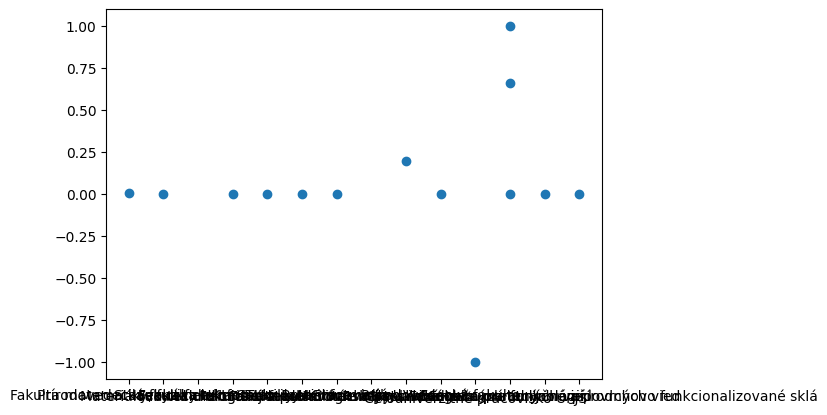

In [517]:
# %pip install matplotlib
import matplotlib.pyplot as plt

ref_granty = []
ref_publikacie = []
pd.options.display.max_rows = 200

for i in sorted(prilohaA.keys())[3:-1]:
    data = prilohaA[i].copy()
    data.columns = data.iloc[1]
    data = data.iloc[2:].rename(columns={'FAKULTA_NAZOV / sucasti' : 'FAKULTA_NAZOV'}).set_index(index_columns)
    
    # display(data)
    if i in ['E4f_M6_humanitne', 'E4e_M5_spolocenske']:
        ref_granty.append(data.loc[:,'grant23'])
    else:
        ref_granty.append(data.loc[:,'granty23'])
    ref_publikacie.append(data.loc[:,'index23fin'])

# print(ref_granty)
# display(rezid_data[0].loc[:,'sum_granty'])
# display(ref_granty[0] - rezid_data[0].loc[:,'sum_granty'])
porovnanie = pd.DataFrame(ref_granty[0])
# display(porovnanie)
porovnanie['nase_sum_granty'] = rezid_data[0].loc[:,'sum_granty'].reset_index().drop(columns=['oblast']).set_index(index_columns)
porovnanie = porovnanie[list(porovnanie.reset_index()['VS_NAZOV'].isna() == False)]
display(porovnanie)

# porovnanie['podiel'] = porovnanie[list(porovnanie['granty23 == 0'] == False)]
porovnanie.loc[porovnanie['granty23'] == 0, 'granty23'] = (porovnanie.loc[porovnanie['granty23'] == 0, 'nase_sum_granty'] / 2).apply(np.abs)
porovnanie = porovnanie.loc[porovnanie['granty23'] != 0]
porovnanie['rozdiel_grantov'] = porovnanie['nase_sum_granty'] / porovnanie['granty23'] - 1
porovnanie
plt.plot(porovnanie.reset_index().set_index('FAKULTA_NAZOV')['rozdiel_grantov'], 'o')


## TODO

- [-] publikacie M6b Zxx
- [x] extrahovat pocty zamestnancov na pracoviskach
- [x] vypisat pracoviska v oblastiach ktore maju aspon 5 zamestancov
- [x] namapovat nazvy skol v grantoch na publikacie
- [-] porovnat publikacnu excelentnost s referencnymi datami
- [x] publikacie ceil(val * 2)
- [x] vyhodnotit regresne modely
- [x] vypocitat rezidua
- [x] standardizovat rezidua do z-skore
- [x] prevahovat z-skore
- [x] urcit horny kvartil z kazdej oblasti
- [ ] porovnat vypocitane z-skore s referencnymi vysledkami
- [ ] odhadnut vyhru
- [ ] spriemerovat s minulorocnou vyhrou
- [ ] preskalovat priemernu vyhru
- [ ] overit AAx duplicitu medzi roznymi pracoviskami
- [ ] overit ci nieje jedna publikacia viackrat v jednej obalasti
- [ ] ...
- [ ] vygenerovat nechutnu tabulku